## Projeto: Análise Exploratória de Dados - ENEM 2022


### Motivação
Este projeto tem como objetivo aprimorar meus conhecimentos e habilidades no campo da Ciência e Análise de Dados, com base nos estudos que tenho realizado. A escolha do tema está relacionada ao meu interesse pela educação e pelas questões socioeconômicas que a envolvem. Como cientista social, analisar esse assunto não só amplia minha capacidade de lidar com dados, mas também oferece a mim e a todos os interessados neste projeto insights profundos e reflexões significativas sobre o Brasil.

### Objeto de Estudo

Vamos trabalhar com informações de [microdados no ENEM realizado em 2022](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem). De acordo com o site do [INEP](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem), o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica.

O ENEM é uma avaliação que reflete não apenas o desempenho dos estudantes, mas também a realidade da educação brasileira. Ao analisar os dados do ENEM 2022, podemos identificar alguns aspectos relevantes sobre as características, as potencialidades e os desafios da educação no país.

Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as notas dos candidatos. Muitos insights e respostas podem ser obtidas somente com a análise exploratória de dados.

## <a id='indice'></a>Índice
- [1. Importando Bibliotecas e Configurando o Pandas](#1.)
- [2. Importando e explorando os dados](#2.)
- [3. Pocessamento dos Dados](#3.)
- [4. Análise Descritiva Das Notas](#4.)
    - [4.1. Dicionário de dados](#4.1.)
    - [4.2. Análise Individual das Notas](#4.2.)
    - [4.3. Notas de Redação](#4.3.)
- [5. Análise Descritiva das Características Gerais dos Candidatos](#5.)
    - [5.1. Idade](#5.1.)
    - [5.2. Sexo](#5.2.)
    - [5.3. Estado Civil](#5.3.)
    - [5.4. Cor/Raça](#5.4.)
    - [5.5. Estado](#5.5.)
- [6. Análise do Questionário Socioeconômico](#6.)
    - [6.1. Análise da pergunta Q001 (Nível de Instrução do Pai)](#6.1.)
    - [6.2. Análise da pergunta Q002 (Nível de Instrução da Mãe)](#6.2.)
    - [6.3. Criando Novas Variáveis a partir de Q001 e Q002](#6.3.)
    - [6.4. Análise da Pergunta Q006 (Renda Familiar)](#6.4.)
- [7. Análise Exploratória](#7.)
    - [7.1. Relação entre Sexo e Nota dos Candidatos](#7.1.)
    - [7.2. Relação entre Cor/Raça e Notas dos Candidatos](#7.2.)
    - [7.3. Relação entre Nível de Instrução dos pais e Notas dos Candidatos](#7.3.)
    - [7.4. Relação entre Renda Familiar e Notas dos Candidatos](#7.4.)
    - [7.5. Relação entre Estado e Notas dos Candidatos](#7.5.)
- [8. Conclusões](#8.)

## <a id='1.'></a>1. Importando Bibliotecas e Configurando o Pandas


[voltar ao índice](#indice)


In [1]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## <a id='2.'></a>2. Importando e explorando os dados
[voltar ao índice](#indice)

In [2]:
# Importanto nossos microdados do ENEM 2022
df_enem = pd.read_csv("C:/Users/guisa/Projetos/EDA_ENEM_2022/MICRODADOS_ENEM_2022.csv", encoding='iso-8859-15', sep= ';')

df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925758,Presidente Tancredo Neves,29,BA,1,1,1,1,1087.00,1056.00,1066.00,1078.00,421.10,546.00,498.80,565.30,DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE,DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB,ABEABADCCADCAAAACDADDCECBAAACADABDEBCBCAAACEB,BDEBACECBCAEBABEDBABDACBCABCDEDEADBAABCBEACCD,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.00,140.00,200.00,120.00,140.00,160.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3201308,Cariacica,32,ES,1,1,1,1,1088.00,1058.00,1067.00,1077.00,490.70,388.60,357.80,416.00,BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA,BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA,ABACCCCBCBAADABBBACABBAABACCBCBBCDCACABABCAAC,BBBACCBABABBBBACDABBBBABCCBBCABBBBAACABBACBCB,1,DDCBBCCDDAADBAABEDABCEEAEBAEBECBDDEBEACCEACCD,CEDAAADBAECBCDDADEABCBECAEEDAEBABBCDECBABEACD,CDBEDACDEACAABDBDBDDCABEEECEABECABEEAAACBBEBAD...,CCCCBXCBABECBEABDDDBDECDBDCAACEECCEBDBAAAEDAE,1.00,120.00,40.00,40.00,100.00,20.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506203,Salinópolis,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


In [3]:
# Quantidade de linhas e colunas
df_enem.shape

(3476105, 76)

In [4]:
# Verificando se cada linha corresponde a um único candidato 
len(df_enem['NU_INSCRICAO'].unique())

3476105

Cada linha corresponde a um único candidato

In [5]:
# Verificando os tipos
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

## <a id='3.'></a>3. Pocessamento dos Dados

Iremos remover algumas colunas que não iremos utilizar em nossa Análise (assim também otimizamos a memória do computador)

[voltar ao índice](#indice)


In [6]:
# Separando as colunas de questões, dos códigos e dos municipios e as notas de competência
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]

colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]

colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]

colunas_comp = [coluna for coluna in df_enem.columns if 'COMP' in coluna]

In [7]:
# Removendo as colunas de questões, dos códigos e dos municipios (+ a inscrição e ano não são necessários para a nossa análise)
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + colunas_comp + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)

In [8]:
# Por fim, vamos reiniciar os índices para visualizar melhor, e observar como ficou nosso DF após as alterações
df_enem = df_enem.reset_index(drop=True)
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,14,M,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A
1,14,M,2,1,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B
2,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B
3,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B
4,4,M,0,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A


## <a id='4.'></a>4. Análise Descritiva Das Notas
[voltar ao índice](#indice)

### <a id='4.1.'></a>4.1. Dicionário de dados

Algumas colunas possuem somente números, sem descrições. Os dados do ENEM vem acompanhados das descrições com o dicionário, explicando o que cada coluna representa. Seguem algumas que vamos utilizar na análise

Faixa Etária (TP_FAIXA_ETARIA)

| Código | Descrição |
| --- | --- |
| 1	| Menor de 17 anos |
| 2	| 17 anos
| 3	| 18 anos
| 4	| 19 anos
| 5	| 20 anos
| 6	| 21 anos
| 7	| 22 anos
| 8	| 23 anos
| 9	| 24 anos
| 10 | 25 anos
| 11 | Entre 26 e 30 anos |
| 12 |	Entre 31 e 35 anos |
| 13 |	Entre 36 e 40 anos |
| 14 |	Entre 41 e 45 anos |
| 15 |	Entre 46 e 50 anos |
| 16 |	Entre 51 e 55 anos |
| 17 |	Entre 56 e 60 anos |
| 18 |	Entre 61 e 65 anos |
| 19 |	Entre 66 e 70 anos |
| 20 |	Maior de 70 anos |

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a) |

Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |
| 6      | Não dispõe da informação |

Tipo de escola do Ensino Médio (TP_ESCOLA)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    1   | Não Respondeu                            |
|    2   | Pública    |
|    3   | Privada |

Colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |
| NU_NOTA_REDACAO | Nota da prova de Redação         |

#### Agora que demos uma olhada em nosso dicionário de dados, vamos dar um describe em nosso DF

In [9]:
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005
count,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,3476105.00,1262744.00,3476105.00,951944.00,951944.00,951944.00,3476105.00,3476105.00,3476105.00,3476105.00,2355395.00,2493442.00,2493442.00,2355395.00,3476105.00,2493442.00,2493442.00,3476105.00
mean,4.86,1.04,2.04,1.03,1.68,2.18,1.44,1.01,0.15,2.44,1.04,1.02,0.68,0.72,0.72,0.68,495.93,526.95,517.44,542.50,0.45,1.19,618.48,3.75
std,3.69,0.39,1.02,0.21,0.73,4.06,0.61,0.08,0.35,0.91,0.18,0.20,0.47,0.45,0.45,0.47,72.01,81.48,77.55,116.02,0.50,0.88,212.21,1.38
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
25%,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,440.50,477.00,468.40,449.00,0.00,1.00,520.00,3.00
50%,3.00,1.00,2.00,1.00,2.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,485.60,529.90,525.50,530.80,0.00,1.00,620.00,4.00
75%,6.00,1.00,3.00,1.00,2.00,2.00,2.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,543.30,581.90,573.20,622.40,1.00,1.00,760.00,4.00
max,20.00,4.00,5.00,4.00,4.00,16.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,875.30,839.20,801.00,985.70,1.00,9.00,1000.00,20.00


### <a id='4.2.'></a>4.2. Análise Individual das Notas
Primeiramente iremos analisar individualmente as variáveis referente as notas
Só depois iremos fazer a relaçõas das notas com outras variáveis

In [10]:
# Separando as colunas de notas e observando as médias
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
media_colunas_notas = df_enem[colunas_notas].mean()
media_colunas_notas = media_colunas_notas.sort_values(ascending=False)
media_colunas_notas

NU_NOTA_REDACAO   618.48
NU_NOTA_MT        542.50
NU_NOTA_CH        526.95
NU_NOTA_LC        517.44
NU_NOTA_CN        495.93
dtype: float64

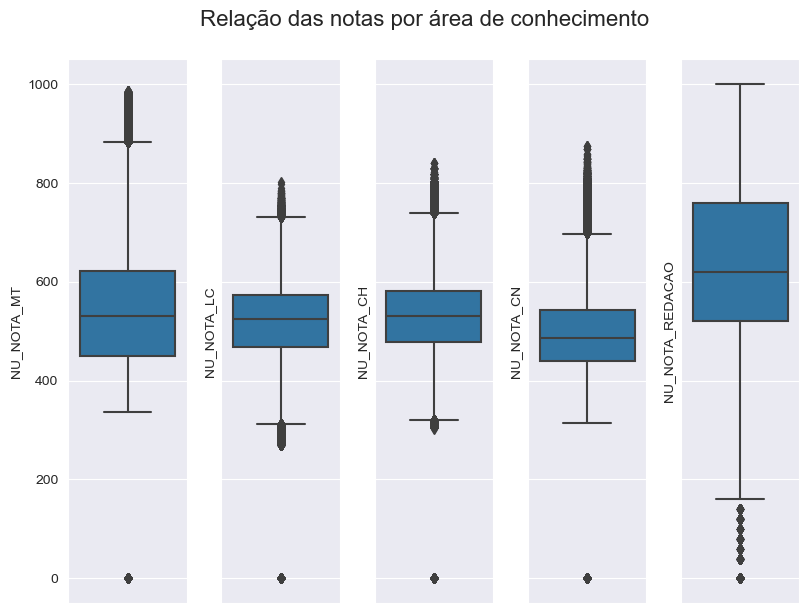

In [48]:
# Criando um gráfico boxplot para análise
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 5, sharey=True, figsize=(8,6))
plt.tight_layout()
figura.suptitle('Relação das notas por área de conhecimento', fontsize=16, y=1.05)

for i in range(5):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])


Ao olharmos o boxplot, vemos que as médias das notas não são muito diferentes entre as áreas de conhecimento. No entanto, podemos destacar algumas coisas:

- A área de Ciências da Natureza tem a menor média, mas há um número significativo de candidatos com notas muito altas, o que cria outliers notáveis nessa área.

- Matemática também tem ligeiramnete a maior média, e assim como em Ciências da Natureza, há muitos candidatos com notas muito altas, o que resulta em outliers.

- A maior variação nas notas ocorre na disciplina de Matemática. Nas outras disciplinas, as notas estão mais igualmente distribuídas entre altas e baixas, o que sugere que os estudantes têm habilidades mais variadas na disciplina de Matemática.

Esses pontos indicam que, embora as médias possam ser semelhantes, a presença de candidatos com notas muito altas em Ciências da Natureza e Matemática mostra que há um grupo de estudantes excepcionais nessas áreas, enquanto a maior variação em Matemática indica que as habilidades dos estudantes nessa disciplina são mais diversas.

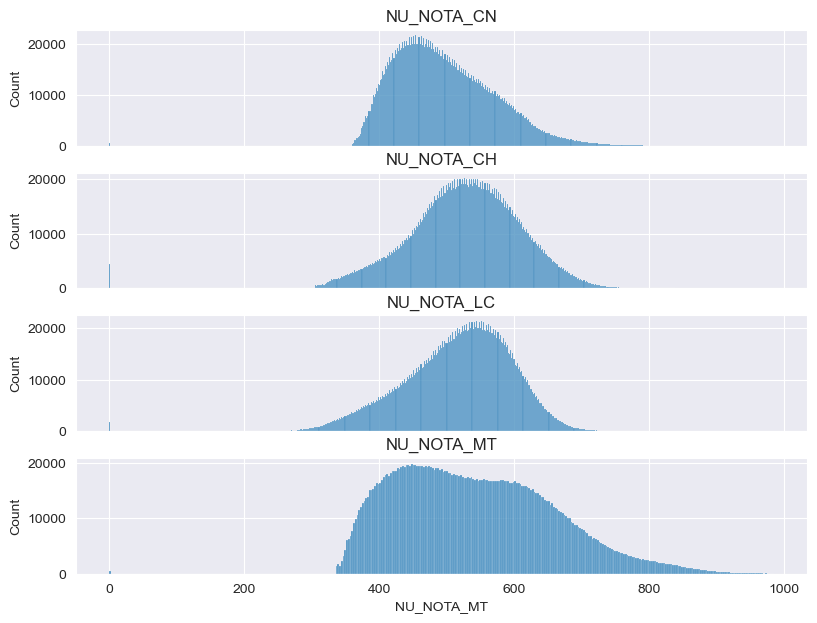

In [12]:
# Analisando as distribuições das notas
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8, 6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Verificamos que a distribuição das notas em Matemática, corroborando com o que já havíamos observado no gráfico anterior, apresenta um pico mais acentuado. Isto sugere que há uma concentração de estudantes com notas próximas à média, mas menos alunos com notas extremamente altas ou baixas. Além disso, as as áreas de Ciências Humanas e de Linguagens e Códigos, exibem uma dispersão menor, assemelhando-se quase a uma distribuição Normal, onde a maioria dos estudantes se concentra em torno da média, com poucos desvios significativos.

### <a id='4.3.'></a>4.3. Notas de Redação
Agora iremos analisar as notas de redação

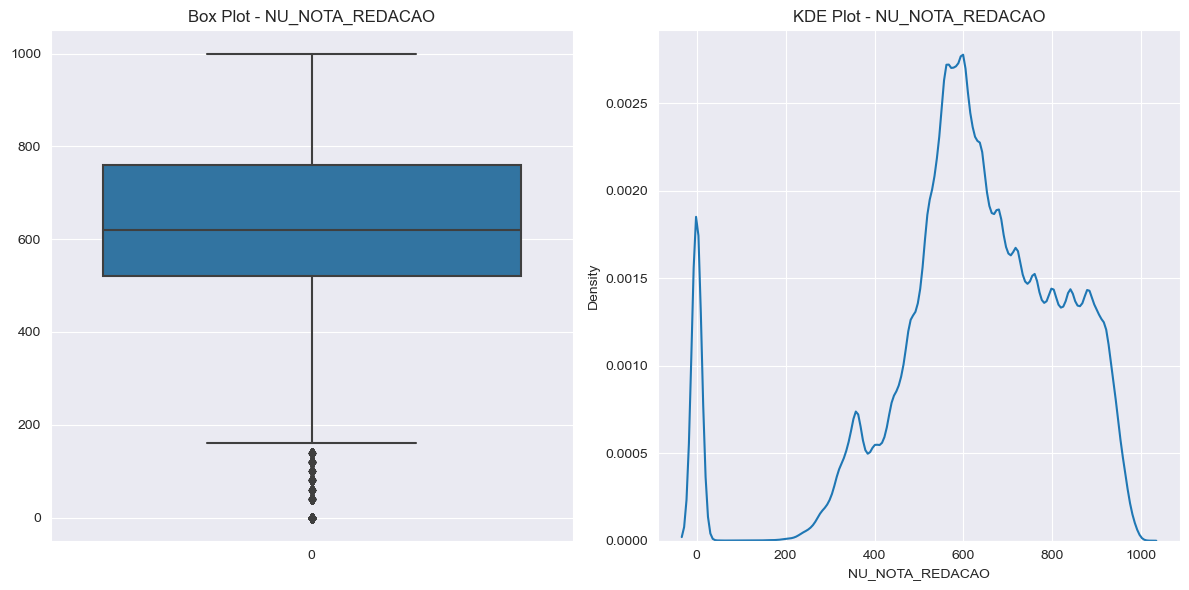

In [13]:
# Criando gráfico para análise da redação
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot do boxplot
sns.set_style("whitegrid")
sns.boxplot(data=df_enem['NU_NOTA_REDACAO'], ax=axes[0])
axes[0].set_title('Box Plot - NU_NOTA_REDACAO')

# Plot do kdeplot
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO'], ax=axes[1])
axes[1].set_title('KDE Plot - NU_NOTA_REDACAO')


plt.tight_layout()
plt.show()

Ao observarmos as notas de redação, é notável que elas têm uma média mais alta em comparação com as outras áreas de conhecimento, com uma pontuação média acima dos 600 pontos. Isso é bastante interessante de notar.

Além disso, é notável que a distribuição das notas de redação se estende bastante acima da média, com muitos estudantes obtendo notas consideravelmente altas, e algumas delas alcançando o valor máximo de 1000 pontos.

Esses resultados sugerem que, em média, os candidatos tiveram um desempenho mais forte na área de redação em comparação com outras disciplinas, e que há uma parcela significativa de estudantes que se destacaram com pontuações muito altas nessa área.

## <a id='5.'></a>5. Análise Descritiva das Características Gerais dos Candidatos
Ainda não iremos relacionar essas informações com as notas


[voltar ao índice](#indice)

### <a id='5.1.'></a>5.1. Idade

In [14]:
# Calculando a contagem e porcentagem em uma única linha
resultados_idade = df_enem['TP_FAIXA_ETARIA'].value_counts(normalize=True).sort_index() * 100

# Aqui iremos introduzir a tabela de descrição das faixas etárias para melhor entendimento
descricao_idade = pd.DataFrame({
    'Código': range(1, 21),
    'Descrição': [
        'Menor de 17 anos',
        '17 anos',
        '18 anos',
        '19 anos',
        '20 anos',
        '21 anos',
        '22 anos',
        '23 anos',
        '24 anos',
        '25 anos',
        'Entre 26 e 30 anos',
        'Entre 31 e 35 anos',
        'Entre 36 e 40 anos',
        'Entre 41 e 45 anos',
        'Entre 46 e 50 anos',
        'Entre 51 e 55 anos',
        'Entre 56 e 60 anos',
        'Entre 61 e 65 anos',
        'Entre 66 e 70 anos',
        'Maior de 70 anos']})

resultados_idade = pd.DataFrame({
    'Código': resultados_idade.index,
    'Porcentagem': resultados_idade.values})

# Mesclando os DataFrames com base no código
resultado_idade = pd.merge(descricao_idade, resultados_idade, on='Código', how='left')
resultado_idade

,Código,Descrição,Porcentagem
0,1,Menor de 17 anos,8.73
1,2,17 anos,20.46
2,3,18 anos,23.18
3,4,19 anos,11.74
4,5,20 anos,7.13
5,6,21 anos,4.77
6,7,22 anos,3.55
7,8,23 anos,2.73
8,9,24 anos,2.11
9,10,25 anos,1.77


Ao analisarmos os dados, fica evidente que existe uma ampla variedade de idades entre os candidatos. No entanto, uma observação imediata nos leva a uma conclusão clara: a grande maioria dos candidatos se encontra na faixa etária de 17 a 19 anos, totalizando 55,38% do total de candidatos.

Se examinarmos individualmente, a idade mais comum entre os candidatos é de 18 anos, representando 23,18% do total, seguida por 17 e 19 anos, com 20,46% e 11,74%, respectivamente.

Essa concentração notável de candidatos nessa faixa etária sugere um padrão marcante na distribuição de idades. Isso indica que a maioria esmagadora dos participantes do exame está na faixa de idade que normalmente corresponde à conclusão do ensino médio.

### <a id='5.2.'></a>5.2. Sexo

In [15]:
# Calcular a contagem e a porcentagem
resultados_sexo = pd.DataFrame({
    'Contagem': df_enem['TP_SEXO'].value_counts(),
    'Porcentagem': df_enem['TP_SEXO'].value_counts(normalize=True) * 100})
resultados_sexo

,Contagem,Porcentagem
TP_SEXO,,
F,2120519,61.00
M,1355586,39.00


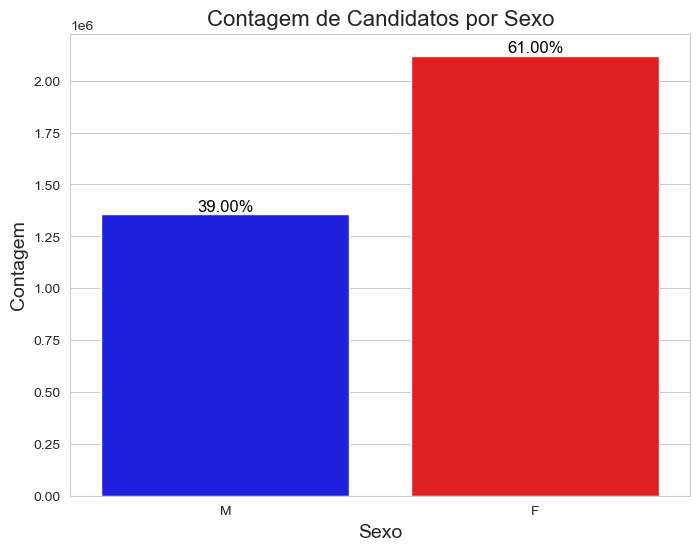

In [16]:
# Criando uma paleta de cores personalizada
cores_personalizadas = {'M': 'blue', 'F': 'red'}

# Criando o Gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_enem, x='TP_SEXO', palette=cores_personalizadas)
plt.title('Contagem de Candidatos por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Calculando a porcentagem para inserir no gráfico
total = len(df_enem) 
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

Predomina no conjunto de candidatos uma representação majoritária do sexo feminino com 61%

### <a id='5.3.'></a>5.3. Estado Civil

In [17]:
# Calculando a contagem e porcentagem em uma única linha
contagem_estado_civil = df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()
porcentagem_estado_civil = (contagem_estado_civil / contagem_estado_civil.sum()) * 100

# Juntando as contagens e as porcentagens em um DataFrame
resultado_estado_civil = pd.DataFrame({'Contagem': contagem_estado_civil, 'Porcentagem': porcentagem_estado_civil})

# Introduzindo tabela de descrição
descricao_estado_civil = pd.DataFrame({
    'Código': [0, 1, 2, 3, 4],
    'Descrição': [
        'Não informado',
        'Solteiro(a)',
        'Casado(a)/Mora com companheiro(a)',
        'Divorciado(a)/Desquitado(a)/Separado(a)',
        'Viúvo(a)']})

# Mesclando os DataFrames com base no código
resultado_estado_civil = pd.merge(descricao_estado_civil, resultado_estado_civil, left_on='Código', right_index=True)
resultado_estado_civil

,Código,Descrição,Contagem,Porcentagem
0,0,Não informado,128493,3.70
1,1,Solteiro(a),3127949,89.98
2,2,Casado(a)/Mora com companheiro(a),165719,4.77
3,3,Divorciado(a)/Desquitado(a)/Separado(a),50380,1.45
4,4,Viúvo(a),3564,0.10


<AxesSubplot:xlabel='TP_ESTADO_CIVIL', ylabel='count'>

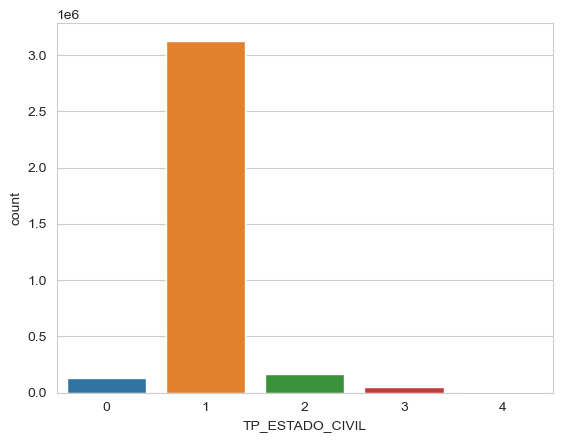

In [18]:
 # Analisando graficamente
sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

A maioria esmagadora dos candidatos é composta por pessoas solteiras, representando cerca de 90% do total.

### <a id='5.4.'></a>5.4. Cor/Raça

In [19]:
# Calculando a contagem e porcentagem em uma única linha
contagem_cor_raca = df_enem['TP_COR_RACA'].value_counts().sort_index()
porcentagem_cor_raca = (contagem_cor_raca / contagem_cor_raca.sum()) * 100

# Juntando as contagens e as porcentagens em um DataFrame
resultado_cor_raca = pd.DataFrame({'Contagem': contagem_cor_raca, 'Porcentagem': porcentagem_cor_raca})

# Introduzindo tabela de descrição
descricao_cor_raca = pd.DataFrame({
    'Código': [0, 1, 2, 3, 4, 5, 6],
    'Descrição': [
        'Não informado',
        'Branca',
        'Preta',
        'Parda',
        'Amarela',
        'Indígena',
        'Não dispõe da informação']})

# Mesclando os DataFrames com base no código
resultado_cor_raca = pd.merge(descricao_cor_raca , resultado_cor_raca , left_on='Código', right_index=True)
resultado_cor_raca 

,Código,Descrição,Contagem,Porcentagem
0,0,Não informado,64867,1.87
1,1,Branca,1428081,41.08
2,2,Preta,408422,11.75
3,3,Parda,1488844,42.83
4,4,Amarela,66051,1.90
5,5,Indígena,19840,0.57


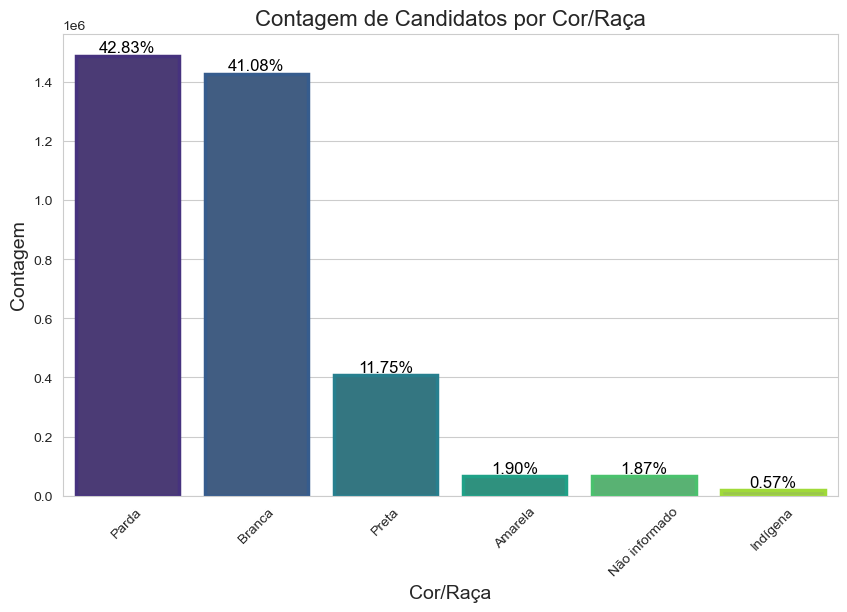

In [21]:
# Criando um dicionário a partir do DF 'descricao_cor_raca' e mapeando
mapeamento_cor_raca = dict(zip(descricao_cor_raca['Código'], descricao_cor_raca['Descrição']))
df_enem['TP_COR_RACA'] = df_enem['TP_COR_RACA'].map(mapeamento_cor_raca)

plt.figure(figsize=(10, 6))

# Crian um countplot ordenado pelas contagens em ordem decrescente
ax = sns.countplot(data=df_enem, x='TP_COR_RACA', 
                   order=df_enem['TP_COR_RACA'].value_counts().index, 
                   palette='viridis', linewidth=2.5, edgecolor=sns.color_palette("viridis", 6))

plt.title('Contagem de Candidatos por Cor/Raça', fontsize=16)
plt.xlabel('Cor/Raça', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Calculando as porcentagens e adicionando ao gráfico
total = len(df_enem)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)

plt.show()

Ao examinarmos os dados, fica evidente que a maioria dos candidatos se autodeclara como pardos, representando 42,83% do total de candidatos. Em segundo lugar, estão os candidatos que se autodeclaram como brancos, com 41,08%.

É importante destacar que, se combinarmos os candidatos que se autodeclaram pretos (11,75%) com os pardos, obtemos a maioria absoluta dos candidatos, totalizando 54,58%.

Além disso, é relevante notar que os candidatos que se autodeclaram como indígenas representam menos de 1% do total de candidatos.

Essa análise ressalta a diversidade étnica entre os candidatos, com uma maioria significativa de autodeclarações como pardos e brancos, enquanto os candidatos autodeclarados pretos e indígenas são menos representativos em termos de números.



### <a id='5.5.'></a>5.5. Estado

In [22]:
# Calculando a contagem e porcentagem em uma única linha
contagem_uf = df_enem['SG_UF_PROVA'].value_counts().sort_index()
porcentagem_uf = (contagem_uf / contagem_uf.sum()) * 100

# Juntando as contagens e as porcentagens em um DataFrame e alterando do maior para o menor
resultado_uf = pd.DataFrame({'Contagem': contagem_uf, 'Porcentagem': porcentagem_uf})
resultado_uf = resultado_uf.sort_values(by='Contagem', ascending=False)
resultado_uf

,Contagem,Porcentagem
SG_UF_PROVA,,
SP,544442,15.66
MG,309781,8.91
BA,265166,7.63
RJ,250890,7.22
CE,226377,6.51
PA,202621,5.83
PE,189595,5.45
RS,152295,4.38
PR,150396,4.33


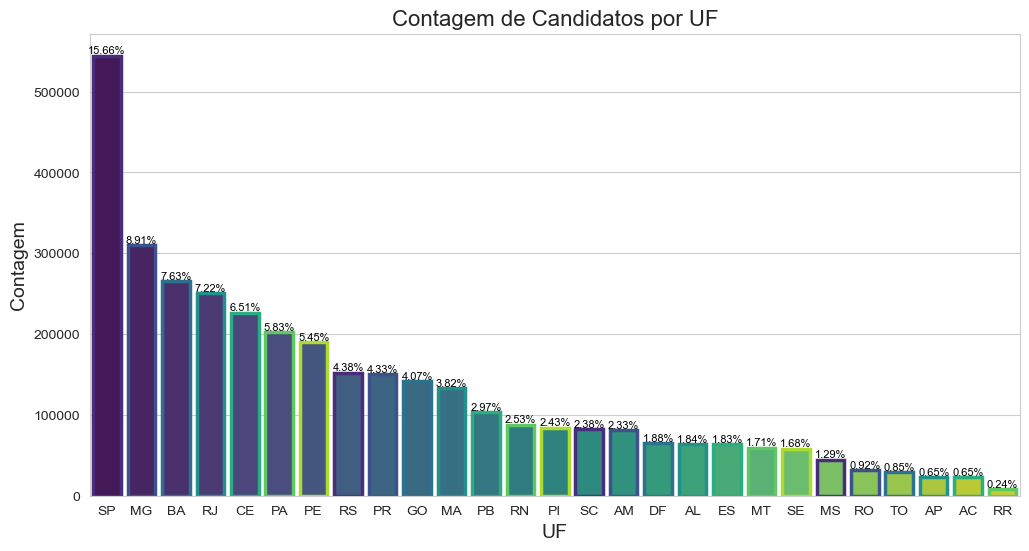

In [23]:
# Contando e ordenando em ordem decrescente
uf_counts = df_enem['SG_UF_PROVA'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_enem, x='SG_UF_PROVA', order=uf_counts.index, palette='viridis', linewidth=2.5, edgecolor=sns.color_palette("viridis", 7))
plt.title('Contagem de Candidatos por UF', fontsize=16)
plt.xlabel('UF', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Calculan as porcentagens e adicionan ao gráfico
total = len(df_enem)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()

Observando o gráfico, torna-se evidente que o Estado de São Paulo lidera significativamente em número de candidatos com 15.66%, destacando-se consideravelmente em relação aos demais estados. Essa discrepância é ainda mais notável ao compararmos com Minas Gerais (8.91%), que ocupa o segundo lugar com uma quantidade substancialmente menor de candidatos em relação a São Paulo.

É importante notar que das 23 unidades federativas, 6 delas (SP, MG, BA, RJ, CE e PA) representam mais que metade do numero de candidatos.


## <a id='6.'></a>6. Análise do Questionário Socioeconômico

| Código | Descrição |
| --- |--- |
| Q001 | Até que série seu pai, ou o homem responsável por você, estudou? |
| Q002 | Até que série sua mãe, ou a mulher responsável por você, estudou? |
| Q006 | Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.) |

[voltar ao índice](#indice)

### <a id='6.1.'></a>6.1. Análise da pergunta Q001 (Nível de Instrução do Pai)
"Até que série seu pai, ou o homem responsável por você, estudou?"

In [24]:
# Calculando a contagem e a porcentagem das respostas da variável Q001
contagem_q001 = df_enem['Q001'].value_counts().sort_index()
porcentagem_q001 = (contagem_q001 / contagem_q001.sum()) * 100

# Criando uma tabela de descrição coletada no dicionário de dados
descricao_q001 = pd.DataFrame({
    'Código': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Descrição': [
        'Nunca estudou',
        'Não completou a 4ª série/5º ano do Ensino Fundamental',
        'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
        'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
        'Completou o Ensino Médio, mas não completou a Faculdade',
        'Completou a Faculdade, mas não completou a Pós-graduação',
        'Completou a Pós-graduação',
        'Não sei']})

# Criando um DataFrame com os resultados
resultado_q001 = pd.DataFrame({'Contagem': contagem_q001})
resultado_q001 = pd.merge(descricao_q001, resultado_q001, left_on='Código', right_index=True)
resultado_q001.rename(columns={'Contagem': 'Porcentagem'}, inplace=True)

# Calculando a porcentagem e adicionando uma nova coluna 'Porcentagem'
resultado_q001['Porcentagem'] = (resultado_q001['Porcentagem'] / resultado_q001['Porcentagem'].sum()) * 100
resultado_q001

,Código,Descrição,Porcentagem
0,A,Nunca estudou,4.02
1,B,Não completou a 4ª série/5º ano do Ensino Fund...,17.29
2,C,"Completou a 4ª série/5º ano, mas não completou...",13.14
3,D,Completou a 8ª série/9º ano do Ensino Fundamen...,11.19
4,E,"Completou o Ensino Médio, mas não completou a ...",28.84
5,F,"Completou a Faculdade, mas não completou a Pós...",9.12
6,G,Completou a Pós-graduação,6.80
7,H,Não sei,9.60


### <a id='6.2.'></a>6.2. Análise da pergunta Q002 (Nível de Instrução da Mãe)
"Até que série seu mãe, ou a mulher responsável por você, estudou?"

In [25]:
# Calculando a contagem e a porcentagem das respostas da variável Q001
contagem_q002 = df_enem['Q002'].value_counts().sort_index()
porcentagem_q002 = (contagem_q002 / contagem_q002.sum()) * 100

# Criando uma tabela de descrição coletada no dicionário de dados
descricao_q002 = pd.DataFrame({
    'Código': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Descrição': [
        'Nunca estudou',
        'Não completou a 4ª série/5º ano do Ensino Fundamental',
        'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
        'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
        'Completou o Ensino Médio, mas não completou a Faculdade',
        'Completou a Faculdade, mas não completou a Pós-graduação',
        'Completou a Pós-graduação',
        'Não sei']})

# Criando um DataFrame com os resultados
resultado_q002 = pd.DataFrame({'Contagem': contagem_q002})
resultado_q002 = pd.merge(descricao_q002, resultado_q002, left_on='Código', right_index=True)
resultado_q002.rename(columns={'Contagem': 'Porcentagem'}, inplace=True)

# Calculando a porcentagem e adicionando uma nova coluna 'Porcentagem'
resultado_q002['Porcentagem'] = (resultado_q002['Porcentagem'] / resultado_q002['Porcentagem'].sum()) * 100
resultado_q002

,Código,Descrição,Porcentagem
0,A,Nunca estudou,2.56
1,B,Não completou a 4ª série/5º ano do Ensino Fund...,12.42
2,C,"Completou a 4ª série/5º ano, mas não completou...",11.11
3,D,Completou a 8ª série/9º ano do Ensino Fundamen...,11.95
4,E,"Completou o Ensino Médio, mas não completou a ...",35.01
5,F,"Completou a Faculdade, mas não completou a Pós...",12.22
6,G,Completou a Pós-graduação,11.56
7,H,Não sei,3.16


Ao compararmos as respostas das duas perguntas, notamos uma tendência geral: as mães ou mulheres responsáveis pelos candidatos têm uma porcentagem maior de conclusão do ensino médio. Essa tendência também se repete quando analisamos aquelas que completaram a graduação e pós-graduação.

Outro ponto importante a destacar é que o número de candidatos que não sabem informar ou não têm os dados de escolaridade dos pais é maior quando se trata dos pais ou responsáveis em comparação as mães ou responsáveis.



### <a id='6.3.'></a>6.3. Criando Novas Variáveis a partir de Q001 e Q002

Aqui iremos criar novas variáveis para delimitar pais que possuem nível superior.
Iremos criar duas colunas, uma com o nome de 'pai_possui_superior', que irá nos retornar False ou True de acordo com as respostas. Sendo: "F : Completou a Faculdade, mas não completou a Pós", e "G : Completou a Pós-graduação". A outra coluna segue a mesma ideia, porém, relacionado a mãe, e com o nome de 'mae_possui_superior'.

In [26]:
# Criando as variáveis e verificando se foram ciadas corretamente
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,14,M,2,Preta,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,A,A,A,B,3,B,B,B,B,B,B,B,A,B,B,B,A,A,A,A,A,A,A,A,A,False,False
1,14,M,2,Branca,1,1,16,1,NaN,0,NaN,NaN,NaN,NaN,DF,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,D,E,E,3,Q,D,E,E,E,E,E,E,E,E,E,E,B,E,B,B,E,B,E,B,False,False
2,5,F,1,Preta,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,BA,1,1,1,1,421.10,546.00,498.80,565.30,1,1.00,760.00,E,F,A,D,2,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,C,A,A,B,False,True
3,6,M,1,Parda,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,ES,1,1,1,1,490.70,388.60,357.80,416.00,1,1.00,320.00,C,A,A,B,3,A,A,C,D,A,A,B,A,B,A,B,A,A,C,A,A,C,B,B,B,False,False
4,4,M,0,Parda,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,D,B,A,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,False,False


In [27]:
# Calculando a porcentagem de pais que possuem ensino superior
porcentagem_pai = (df_enem['pai_possui_superior'].sum() / len(df_enem)) * 100

# Calculando a porcentagem de mães que possuem ensino superior
porcentagem_mae = (df_enem['mae_possui_superior'].sum() / len(df_enem)) * 100

print(f"Porcentagem de pais que possuem ensino superior: {porcentagem_pai}%")
print(f"Porcentagem de mães que possuem ensino superior: {porcentagem_mae}%")

Porcentagem de pais que possuem ensino superior: 15.914248850365567%
Porcentagem de mães que possuem ensino superior: 23.78460949827465%


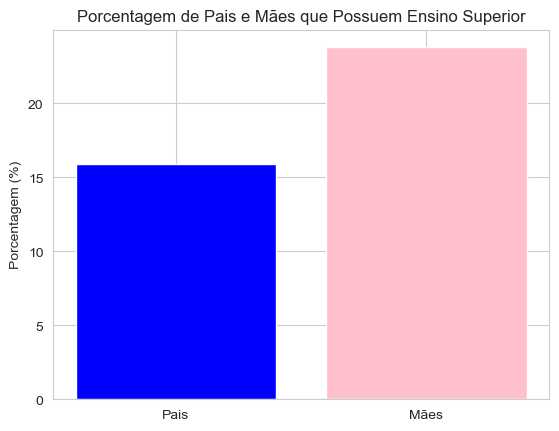

In [28]:
# Vamos analisar graficamnete a diferença

# Rótulos das categorias
categorias_pai_mae = ['Pais', 'Mães']

# Valores correspondentes às porcentagens
valores_pai_mae = [porcentagem_pai, porcentagem_mae]

# Criaando um gráfico de barras
plt.bar(categorias_pai_mae, valores_pai_mae, color=['blue', 'pink'])
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de Pais e Mães que Possuem Ensino Superior')
plt.show()

Aqui, podemos confirmar que, como mencionado anteriormente, uma porcentagem maior de mães concluiu o ensino superior em comparação com os pais. No entanto, ao observarmos essas porcentagens, também podemos notar que o número de pais e mães que possuem ensino superior é consideravelmente inferior àqueles que não têm essa qualificação. Para ser mais preciso, 84,09% dos pais não completaram o ensino superior, enquanto 76,22% das mães também não possuem essa formação.

Essa observação destaca que a maioria dos candidatos tem pais e mães que não completaram o ensino superior. 

### <a id='6.4.'></a>6.4. Análise da Pergunta Q006 (Renda Familiar)

"Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)"

In [29]:
# Calculando a contagem e a porcentagem das respostas da variável Q006
contagem_q006 = df_enem['Q006'].value_counts().sort_index()
porcentagem_q006 = (contagem_q006 / contagem_q006.sum()) * 100

# Criando uma tabela de descrição coletada no dicionário de dados
descricao_q006 = pd.DataFrame({
    'Código': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'],
    'Descrição em Reais': [
        'Nenhuma Renda',
        'Até 1.212,00',
        'De 1.212,01 até 1.818,00',
        'De 1.818,01 até 2.424,00',
        'De 2.424,01 até 3.030,00',
        'De 3.030,01 até 3.636,00',
        'De 3.636,01 até 4.848,00',
        'De 4.848,01 até 6.060,00',
        'De 6.060,01 até 7.272,00',
        'De 7.272,01 até 8.484,00',
        'De 8.484,01 até 9.696,00',
        'De 9.696,01 até 10.908,00',
        'De 10.908,01 até 12.120,00',
        'De 12.120,01 até 14.544,00',
        'De 14.544,01 até 18.180,00',
        'De 18.180,01 até 24.240,00',
        'Acima de 24.240,00']})


# Juntando as contagens, porcentagens e descrições em um DataFrame
resultado_q006 = pd.DataFrame({'Código': contagem_q006.index, 'Contagem': contagem_q006, 'Porcentagem': porcentagem_q006})

# Mesclando com a tabela de descrição usando o código como chave
resultado_q006 = pd.merge(descricao_q006, resultado_q006, left_on='Código', right_on='Código')
resultado_q006 = resultado_q006.sort_values(by='Contagem', ascending=False)
resultado_q006

,Código,Descrição em Reais,Contagem,Porcentagem
1,B,"Até 1.212,00",1022869,29.43
2,C,"De 1.212,01 até 1.818,00",584278,16.81
3,D,"De 1.818,01 até 2.424,00",414266,11.92
4,E,"De 2.424,01 até 3.030,00",276704,7.96
0,A,Nenhuma Renda,204475,5.88
6,G,"De 3.636,01 até 4.848,00",194319,5.59
7,H,"De 4.848,01 até 6.060,00",188751,5.43
5,F,"De 3.030,01 até 3.636,00",158091,4.55
8,I,"De 6.060,01 até 7.272,00",78916,2.27
9,J,"De 7.272,01 até 8.484,00",54984,1.58


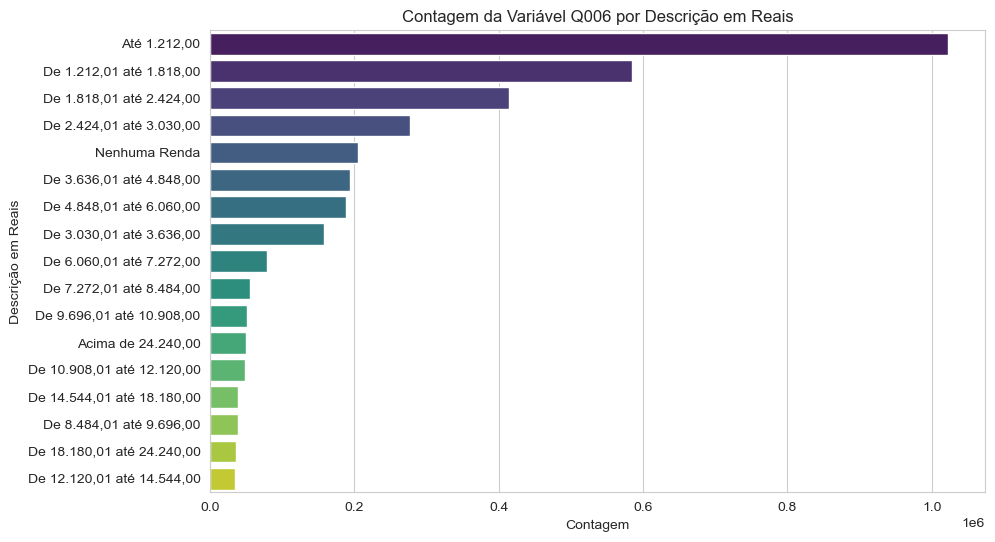

In [30]:
order = resultado_q006.sort_values(by='Contagem', ascending=False)['Descrição em Reais']

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))  # Tamanho da figura
sns.barplot(x='Contagem', y='Descrição em Reais', data=resultado_q006, order=order, palette='viridis')
plt.title('Contagem da Variável Q006 por Descrição em Reais')
plt.xlabel('Contagem')
plt.ylabel('Descrição em Reais')
plt.show()


É perceptível uma tendência marcante em relação à renda familiar da maioria dos candidatos do ENEM, que se situa em patamares consideravelmente baixos, frequentemente (cerca de 30% dos candidatos) não ultrapassando o limite de 1212 Reais (Salário mínimo em 2022). Essa observação destaca uma predominância de situações econômicas modestas entre os participantes do exame.

## <a id='7.'></a>7. Análise Exploratória

Agora sim vamos relacionar as notas dos candidatos com algumas características

- sexo
- raça
- instrucao mae e pai
- renda mensal da familia

[voltar ao índice](#indice)

### <a id='7.1.'></a>7.1. Relação entre Sexo e Nota dos Candidatos

In [31]:
# Criando df com as notas e sexo dos candidatos
df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,M
1,NaN,NaN,NaN,NaN,NaN,M
2,421.10,546.00,498.80,565.30,760.00,F
3,490.70,388.60,357.80,416.00,320.00,M
4,NaN,NaN,NaN,NaN,NaN,M


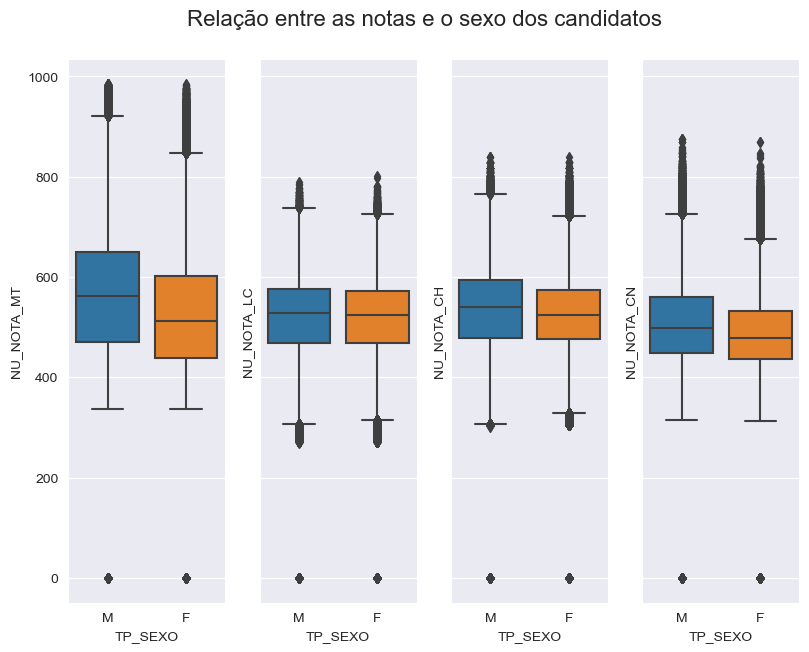

In [44]:
# Analisando as notas por sexo com boxplot
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

figura.suptitle('Relação entre as notas e o sexo dos candidatos', fontsize=16, y=1.05)

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i])

Ao estabelecer uma relação entre as notas e o sexo dos candidatos, é perceptível que, em todas as áreas de conhecimento, os candidatos do sexo masculino apresentaram um desempenho ligeiramente superior em comparação com suas contrapartes do sexo feminino. No entanto, é importante ressaltar que essa discrepância é marginal. A diferença entre as médias de gênero é relativamente pequena em todas as disciplinas, indicando uma proximidade geral no desempenho acadêmico.

Uma exceção notável surge ao analisar as notas de matemática, onde a mediana dos candidatos do sexo masculino apresenta uma ligeira distância maior em relação às notas das candidatas do sexo feminino. Essa discrepância um pouco mais significativa nas notas de matemática sugere que pode haver influências específicas ligadas ao gênero que impactam o desempenho nessa disciplina.

<font size="-1">_No entanto, é crucial enfatizar que esta análise considera apenas a relação entre as notas e o sexo dos candidatos, sem investigar possíveis fatores contextuais, sociais ou educacionais que possam contribuir para as diferenças observadas. Portanto, a conclusão sobre a discrepância nas notas por gênero deve ser interpretada dentro das limitações das informações disponíveis e com a consciência de que diversos elementos podem influenciar esses resultados._</font>

### <a id='7.2.'></a>7.2. Relação entre Cor/Raça e Notas dos Candidatos

In [33]:
# Criando df com as notas e cor/raça dos candidatos
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,Preta
1,NaN,NaN,NaN,NaN,NaN,Branca
2,421.10,546.00,498.80,565.30,760.00,Preta
3,490.70,388.60,357.80,416.00,320.00,Parda
4,NaN,NaN,NaN,NaN,NaN,Parda


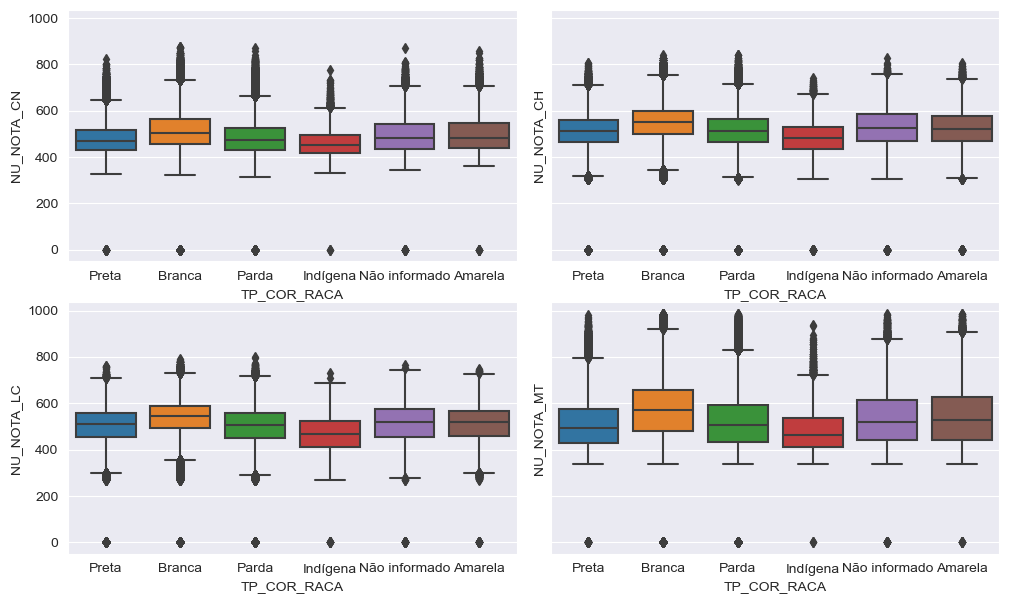

In [34]:
# Analisando as notas por cor/raça
sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |
| 6      | Não dispõe da informação |

Com base na análise do gráfico de boxplot, somos capazes de identificar sutis variações nas notas dos candidatos em relação às suas raças. Embora essas diferenças sejam relativamente pequenas, é perceptível que os candidatos de raça branca tendem a apresentar notas ligeiramente mais elevadas em comparação com outras raças. Essa discrepância, embora modesta, torna-se mais pronunciada ao examinarmos as notas de matemática.

Além disso, é evidente que, de maneira geral, candidatos de origem indígena demonstram notas mais baixas. Essa observação sugere a possibilidade de disparidades na qualidade da educação, levando a uma desvantagem acadêmica para candidatos indígenas. É crucial salientar que, embora não possamos afirmar causalidade com base apenas nos dados disponíveis, essa análise nos permite identificar tais padrões.

<font size="-1">_Essa análise levanta a hipótese de que fatores socioeconômicos e de acesso à educação podem estar influenciando as diferenças observadas nas notas entre as raças. No entanto, uma abordagem mais abrangente seria necessária para confirmar qualquer relação causal. Portanto, a conclusão sobre as discrepâncias raciais nas notas deve ser interpretada dentro das limitações dos dados disponíveis, com a consciência de que diversos elementos podem contribuir para essas variações._</font>

### <a id='7.3.'></a>7.3. Relação entre Nível de Instrução dos pais e Notas dos Candidatos


In [35]:
# Criando df com as notas e nível de instrução dos pais e mães
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,NaN,NaN,NaN,NaN,NaN,False,False
2,421.10,546.00,498.80,565.30,760.00,False,True
3,490.70,388.60,357.80,416.00,320.00,False,False
4,NaN,NaN,NaN,NaN,NaN,False,False


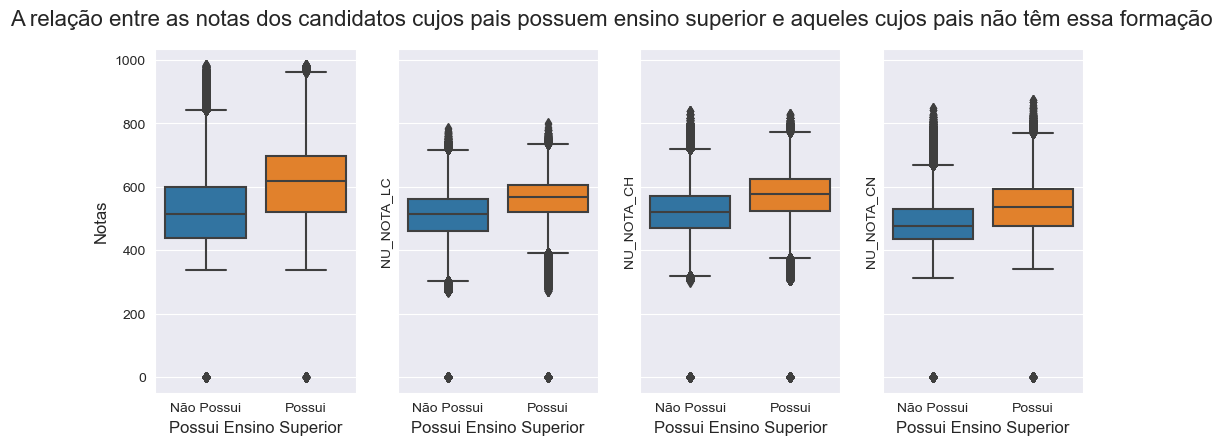

In [45]:
# Criando Gráfico
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

# Definindo as legendas para True e False e Título
legendas = {True: 'Possui', False: 'Não Possui'}
figura.suptitle('A relação entre as notas dos candidatos cujos pais possuem ensino superior e aqueles cujos pais não têm essa formação', fontsize=16, y=1.05)

# Loop para criar os gráficos
for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])
    
    # Adicionando as legendas ao gráfico
    graficos[i].set_xticklabels([legendas.get(x) for x in graficos[i].get_xticks()])
    graficos[i].set_xlabel('Possui Ensino Superior', fontsize=12)

# Definindo o rótulo do eixo y para todos os subplots
graficos[0].set_ylabel('Notas', fontsize=12)

plt.show()

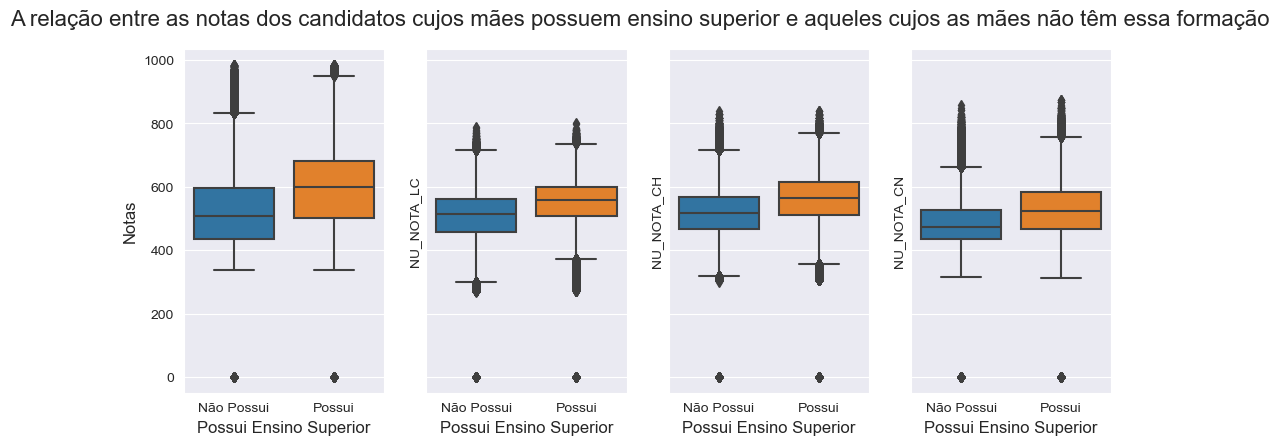

In [47]:
# Analisando as notas por nivel instrução mães
# Criando Gráfico
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
plt.tight_layout()

# Definindo as legendas para True e False e Título
legendas = {True: 'Possui', False: 'Não Possui'}
figura.suptitle('A relação entre as notas dos candidatos cujos mães possuem ensino superior e aqueles cujos as mães não têm essa formação', fontsize=16, y=1.05)
, fontsize=16, y=1.05)

# Loop para criar os gráficos
for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])
    
    # Adicionando as legendas ao gráfico
    graficos[i].set_xticklabels([legendas.get(x) for x in graficos[i].get_xticks()])
    graficos[i].set_xlabel('Possui Ensino Superior', fontsize=12)

# Definindo o rótulo do eixo y para todos os subplots
graficos[0].set_ylabel('Notas', fontsize=12)

plt.show()

A análise evidencia claramente que candidatos que contam tanto com pais quanto com mães com ensino superior apresentam notas mais elevadas em comparação com aqueles cujos pais não atingiram esse patamar educacional. A relação entre a presença de pais e mães com ensino superior e o desempenho acadêmico dos candidatos é notável, destacando um impacto positivo na trajetória educacional.

Destaca-se, especialmente, que essa influência se torna mais pronunciada nas notas de matemática. Candidatos com ambos os pais com ensino superior demonstram um desempenho mais notável nessa disciplina em particular.

### <a id='7.4.'></a>7.4. Relação entre Renda Familiar e Notas dos Candidatos


Iremos criar um gráfico com todas as notas em relação a rendas familiar dos candidatos


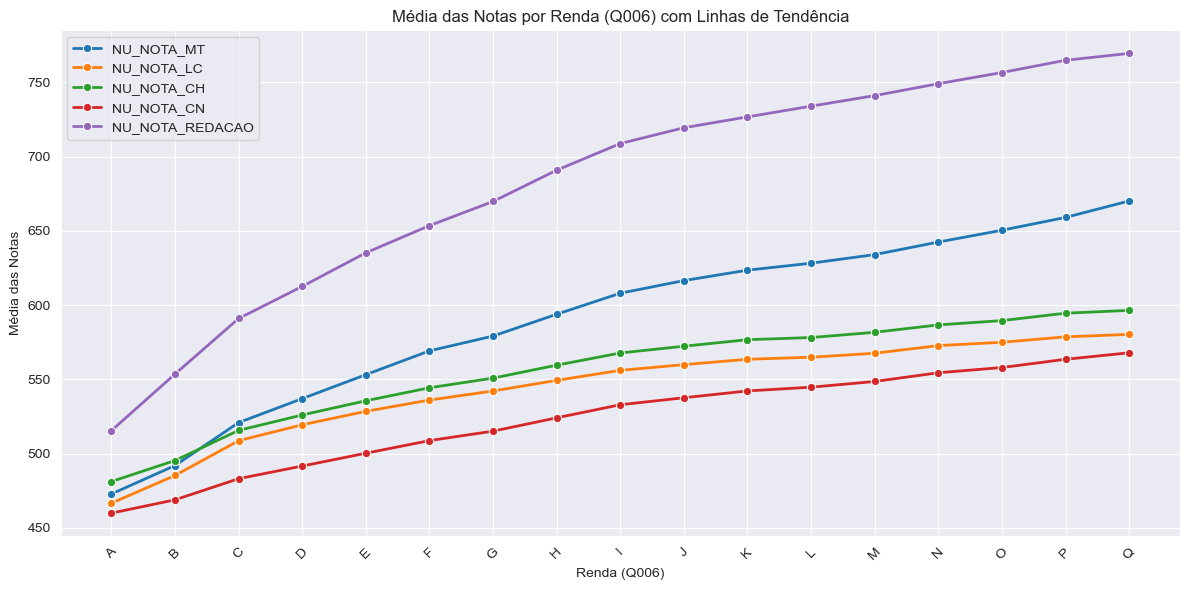

In [38]:
# Colunas das notas
colunas_notas = ['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']

# Calculando a média das notas para cada categoria de renda
media_notas_por_renda = df_enem.groupby('Q006')[colunas_notas].mean().reset_index()

# Criando um único gráfico para sobrepor as médias de todas as notas
plt.figure(figsize=(12, 6))

# Loop para criar gráficos para cada nota e sobrepor
for coluna in colunas_notas:
    sns.lineplot(data=media_notas_por_renda, x='Q006', y=coluna, marker='o', linewidth=2, label=coluna)

plt.xlabel('Renda (Q006)')
plt.ylabel('Média das Notas')
plt.title('Média das Notas por Renda (Q006) com Linhas de Tendência')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| Código | Descrição em Reais                      |    | Código | Descrição em Reais                      |    | Código | Descrição em Reais                      |
| ------ | -------------------------------------- |    | ------ | -------------------------------------- |    | ------ | -------------------------------------- |
| A      | Nenhuma Renda                          |    | G      | De 3.636,01 até 4.848,00              |    | M      | De 10.908,01 até 12.120,00            |
| B      | Até 1.212,00                           |    | H      | De 4.848,01 até 6.060,00              |    | N      | De 12.120,01 até 14.544,00            |
| C      | De 1.212,01 até 1.818,00              |    | I      | De 6.060,01 até 7.272,00              |    | O      | De 14.544,01 até 18.180,00            |
| D      | De 1.818,01 até 2.424,00              |    | J      | De 7.272,01 até 8.484,00              |    | P      | De 18.180,01 até 24.240,00            |
| E      | De 2.424,01 até 3.030,00              |    | K      | De 8.484,01 até 9.696,00              |    | Q      | Acima de 24.240,00                    |
| F      | De 3.030,01 até 3.636,00              |    | L      | De 9.696,01 até 10.908,00             |    |


Ao observarmos o gráfico, fica evidente que, à medida que a renda das famílias aumenta, as notas dos candidatos tendem a ser mais altas. Esse padrão é ainda mais evidente quando examinamos as notas nas disciplinas de Matemática e Redação. Portanto, podemos concluir que existe uma correlação entre a renda familiar e as notas dos candidatos.

No entanto, é importante notar que a análise dessa relação é limitada pela distribuição das faixas de renda. Se tivéssemos valores de renda mais precisos em vez de faixas salariais, poderíamos realizar uma análise mais detalhada e quantitativa para entender o quão significativa é essa relação. As faixas salariais limitam nossa capacidade de fornecer interpretações mais precisas dos dados, mas a tendência geral de notas mais altas com rendas familiares mais altas é claramente observável.

### <a id='7.5.'></a>7.5. Relação entre Estado e Notas dos Candidatos

Iremos criar um gráfico com todas as notas em relação aos Estados dos candidatos

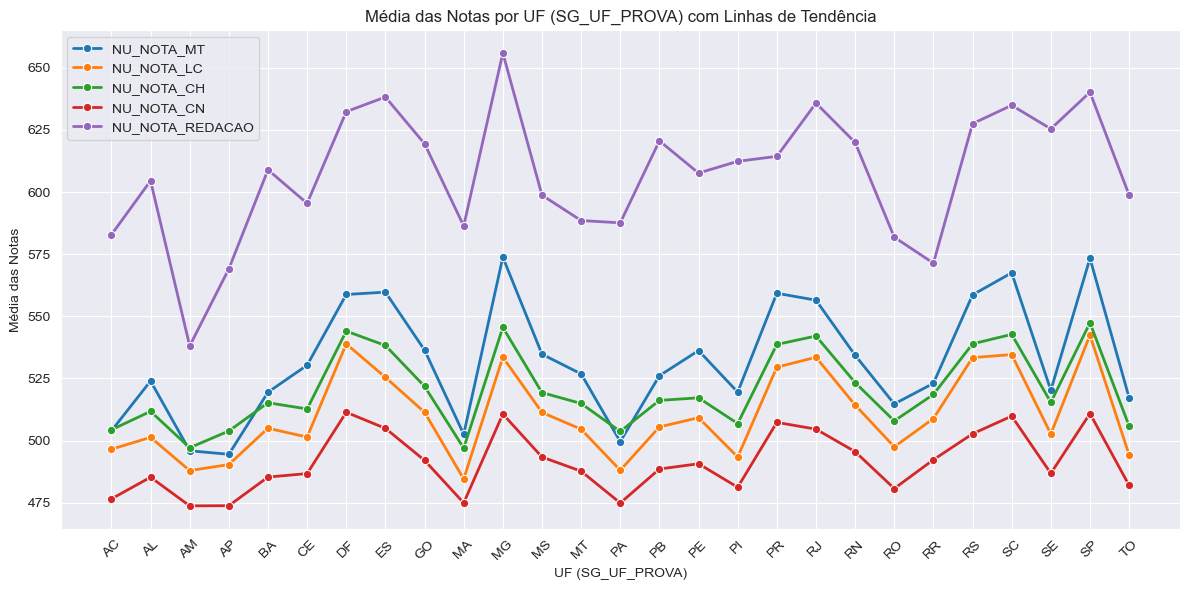

In [39]:
# Calculando a média das notas para cada UF
media_notas_por_uf = df_enem.groupby('SG_UF_PROVA')[colunas_notas].mean().reset_index()

# Criando um único gráfico para sobrepor as médias de todas as notas
plt.figure(figsize=(12, 6))

# Loop para criar gráficos para cada nota e sobrepor
for coluna in colunas_notas:
    sns.lineplot(data=media_notas_por_uf, x='SG_UF_PROVA', y=coluna, marker='o', linewidth=2, label=coluna)

plt.xlabel('UF (SG_UF_PROVA)')
plt.ylabel('Média das Notas')
plt.title('Média das Notas por UF (SG_UF_PROVA) com Linhas de Tendência')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Neste gráfico, podemos destacar vários pontos interessantes. Primeiramente, notamos que o comportamento das notas é bastante semelhante em quase todos os estados. Em termos gerais, quando as notas aumentam em um estado, elas tendem a aumentar em todos, e quando diminuem, diminuem em todos também.

Além disso, é notável visualizar em quais matérias os candidatos tiveram um desempenho melhor e pior. Em ordem crescente, a área de Ciências da Natureza apresenta o menor desempenho, seguida por Linguagens e Códigos, depois Ciências Humanas e Matemática, e finalmente a Redação com a média mais alta.

É importante destacar que São Paulo (SP) e Minas Gerais (MG) se destacam com as maiores médias na maioria das áreas de conhecimento. Esses estados parecem ter um desempenho geralmente superior em comparação com os outros, o que pode ser indicativo de diferenças no sistema educacional ou em outros fatores socioeconômicos que afetam o desempenho dos candidatos.

## <a id='8.'></a>8. Conclusões
[voltar ao índice](#indice)


### Desempenho por Área de Conhecimento:

- As médias das notas não variam significativamente entre as áreas de conhecimento.
- Ciências da Natureza e Matemática têm médias ligeiramente mais altas e apresentam candidatos excepcionais com notas muito altas, resultando em outliers notáveis.
- Matemática tem a maior variação nas notas, sugerindo uma diversidade maior de habilidades dos estudantes nessa disciplina.

### Desempenho na Redação:

- A área de Redação tem a média mais alta, com muitos estudantes obtendo notas consideravelmente altas e alguns alcançando a pontuação máxima de 1000 pontos.
- Isso sugere um desempenho mais forte em Redação em comparação com outras disciplinas.

### Idade dos Candidatos:

- A maioria esmagadora dos candidatos tem idades entre 17 e 19 anos, indicando que estão na faixa etária típica de conclusão do ensino médio.

### Gênero dos Candidatos:

- As candidatas do sexo feminino superam em número os candidatos do sexo masculino, representando 61% do total.

### Estado Civil dos Candidatos:

- A maioria esmagadora dos candidatos é composta por pessoas solteiras, representando cerca de 90% do total.

### Autodeclaração de Raça/Etnia:

- A maioria dos candidatos se autodeclara como pardos e brancos, com uma maioria absoluta quando combinados. Candidatos pretos e indígenas são menos representativos.

### Distribuição Geográfica dos Candidatos:

- O Estado de São Paulo lidera em número de candidatos, seguido por Minas Gerais. Alguns estados representam a maior parte dos candidatos.

### Escolaridade dos Pais:

- Candidatos cujos pais possuem ensino superior tendem a ter notas mais altas, especialmente em Matemática. A maioria dos pais e mães dos candidatos não completou o ensino superior.

### Renda Familiar:

- Há uma correlação positiva entre a renda familiar e as notas dos candidatos, especialmente em Matemática e Redação.

### Desempenho por Gênero:

- Os candidatos do sexo masculino tendem a ter um desempenho ligeiramente superior em todas as áreas de conhecimento, com uma discrepância um pouco mais significativa em Matemática.

### Desempenho por Raça/Etnia:

- Candidatos brancos tendem a ter notas ligeiramente mais altas, enquanto candidatos indígenas têm notas mais baixas em geral.

### Desempenho por Estado:

- São Paulo e Minas Gerais se destacam com as maiores médias na maioria das áreas de conhecimento, sugerindo diferenças no sistema educacional ou fatores socioeconômicos.

### Perfil "Padrão" do Candidato do ENEM:

O perfil mais comum entre os candidatos é o de mulheres solteiras, com 18 anos, autodeclaradas pardas, e renda familiar inferior a R$1.500,00.

---------------

Essas conclusões fornecem uma visão abrangente do perfil dos candidatos e do desempenho deles no exame. No entanto, é importante lembrar que essas análises são baseadas em dados observados e não estabelecem causalidade. Elas podem ser úteis para orientar políticas educacionais e programas de apoio aos estudantes.

[voltar ao índice](#indice)